In [2]:
from numpy import pi, sin, cos

# !pip install PrettyTable
from prettytable import PrettyTable

import matplotlib.pyplot as plt

In [3]:
a = 0
b = pi
n = int(input('N'))
print(f'a: {a}\nb: {b}\nN: {n}')

def f(x):
    return ((sin(x*cos(2*x)))/(x**2 + 5))**2
def divide_evenly(a, b, len):
    # n-1 bc: | 1 | 2 | 3 | - we divide on 4 points with 3 steps
    step = (b-a)/(len-1)
    return [a+i*step for i in range(len)] 

a: 0
b: 3.141592653589793
N: 10


In [4]:
x_list = divide_evenly(a, b ,n)
y_list = [f(i) for i in x_list]
print(x_list)
print(y_list)

[0.0, 0.3490658503988659, 0.6981317007977318, 1.0471975511965976, 1.3962634015954636, 1.7453292519943295, 2.0943951023931953, 2.443460952792061, 2.792526803190927, 3.141592653589793]
[0.0, 0.0026612985545323765, 0.0004856856522839677, 0.00672606979353648, 0.019350053192414063, 0.01537216994444243, 0.008512453285061887, 0.0014082433203238156, 0.004336219037158784, 6.783016515456898e-35]


In [5]:
# https://studfiles.net/preview/4030410/
# t=x, y=x, i=j
def lagrange(x, x_values, y_values):
    res = 0 # bc we add
    for i, (x_i, y_i) in enumerate(zip(x_values, y_values)):
        mul = 1 # bc we multiply
        for j, x_j in enumerate(x_values):
            if j != i:
                mul *= (x - x_j) / (x_i - x_j)
            else:
                continue
        res += y_i * mul
    return res

l = [lagrange(i, x_list, y_list) for i in x_list]
print(l)

[0.0, 0.0026612985545323765, 0.0004856856522839677, 0.00672606979353648, 0.019350053192414063, 0.01537216994444243, 0.008512453285061887, 0.0014082433203238156, 0.004336219037158784, 6.783016515456898e-35]


In [6]:
m = int(input('M'))
print(f'm: {m}')

m: 50


In [7]:
xm_list = divide_evenly(a, b, m)
ym_list = [f(i) for i in xm_list]
lm = [lagrange(i, x_list, y_list) for i in xm_list]
print(xm_list)
print(ym_list)
print(lm)

[0.0, 0.0641141357875468, 0.1282282715750936, 0.19234240736264038, 0.2564565431501872, 0.32057067893773394, 0.38468481472528077, 0.4487989505128276, 0.5129130863003744, 0.5770272220879211, 0.6411413578754679, 0.7052554936630148, 0.7693696294505615, 0.8334837652381083, 0.8975979010256552, 0.9617120368132019, 1.0258261726007487, 1.0899403083882955, 1.1540544441758422, 1.218168579963389, 1.2822827157509358, 1.3463968515384828, 1.4105109873260295, 1.4746251231135763, 1.538739258901123, 1.6028533946886698, 1.6669675304762166, 1.7310816662637634, 1.7951958020513104, 1.8593099378388571, 1.9234240736264039, 1.9875382094139507, 2.0516523452014974, 2.1157664809890444, 2.179880616776591, 2.243994752564138, 2.3081088883516845, 2.3722230241392315, 2.436337159926778, 2.500451295714325, 2.5645654315018716, 2.6286795672894185, 2.6927937030769655, 2.756907838864512, 2.821021974652059, 2.8851361104396056, 2.9492502462271526, 3.013364382014699, 3.077478517802246, 3.141592653589793]
[0.0, 0.00016125300722

In [8]:
table = PrettyTable()

table.field_names = ["x", "f(x)", "L(x)"]

for i, (xm_i, ym_i, lm_i) in enumerate(zip(xm_list, ym_list, lm)):
    table.add_row([xm_i, ym_i, lm_i])
print(table)

+---------------------+------------------------+------------------------+
|          x          |          f(x)          |          L(x)          |
+---------------------+------------------------+------------------------+
|         0.0         |          0.0           |          0.0           |
|  0.0641141357875468 |  0.000161253007220479  | -0.014527985057001327  |
|  0.1282282715750936 | 0.0006082265534836332  | -0.015477599715823635  |
| 0.19234240736264038 | 0.0012396014756690444  |  -0.01052254454117867  |
|  0.2564565431501872 | 0.0019135957690836717  | -0.004238404557894024  |
| 0.32057067893773394 | 0.0024795555239464475  | 0.0009741775177040897  |
| 0.38468481472528077 | 0.0028088236284529444  |  0.004168715817041327  |
|  0.4487989505128276 | 0.0028193799684888103  | 0.0053030834064936565  |
|  0.5129130863003744 |  0.002492679340703877  |  0.004832420918069086  |
|  0.5770272220879211 | 0.0018836015215234648  | 0.0034194393071698024  |
|  0.6411413578754679 | 0.001124005554

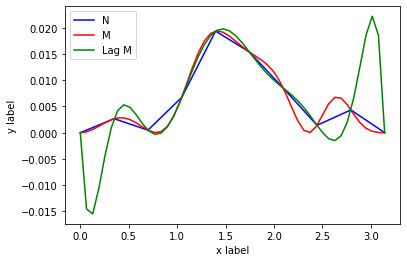

In [10]:
plt.plot(x_list, y_list, color='b', label='N')
plt.plot(xm_list, ym_list, color='r', label='M')
# plt.plot(xm_list, ym_list, color='b', label='M')
plt.plot(xm_list, lm, color='g', label='Lag M')
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend(loc='best')
